In [1]:
import sys
sys.path.append("../")
sys.path.append("../../")
sys.path.append("../../influential_points")

from experiments import ExperimentRunner

In [2]:
import numpy as np
import tensorflow as tf

## Set-up Data

In [3]:
dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

num_train_points = 6000
num_test_points = 1000

train_x = train_images[:num_train_points] / 255.0
test_x = test_images[:num_test_points] / 255.0

train_y = tf.keras.utils.to_categorical(train_labels[:num_train_points], dtype="float64")
test_y = tf.keras.utils.to_categorical(test_labels[:num_test_points], dtype="float64")

In [4]:
scores = np.load("../output/lr_on_fashion_mnist_scores.npz")

inf = scores["influence"]
rif = scores["theta_relatif"]

gc = scores["grad_cos"]

# Representer values should be those for appropriate class.
rp = scores["representer_values"][np.arange(num_train_points), :, train_labels[:num_train_points]]

# TODO: Get Shapley values and perform global experiments.

In [5]:
# Read-able labels to display.
classes = np.array([
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
])

train_true = classes[train_labels[:num_train_points]]
test_true = classes[test_labels[:num_test_points]]

preds = np.load("../output/lr_on_fashion_mnist_preds.npz")
train_preds = classes[np.argmax(preds["train_preds"], axis=1)]
test_preds = classes[np.argmax(preds["test_preds"], axis=1)]

In [6]:
# Potential points of interest.
print("T-shirt/tops:", np.arange(num_test_points)[test_true == "T-shirt/top"][:10])
print("Trousers:", np.arange(num_test_points)[test_true == "Trouser"][:10])
print("Misclassified:", np.arange(num_test_points)[test_true != test_preds][:10])

T-shirt/tops: [ 19  27  35  59  71  85  88  96 113 120]
Trousers: [ 2  3  5 15 24 41 47 64 65 76]
Misclassified: [ 8 10 11 12 17 20 21 23 25 26]


In [6]:
e = ExperimentRunner(
    inf,
    rif,
    gc,
    rp,
    None,
    train_x,
    train_y,
    test_x,
    test_y,
    num_train_points,
    num_test_points,
    classes,
    train_true,
    test_true,
    train_preds,
    test_preds
)

## Visualising Examples

### Global Examples

### Local Examples

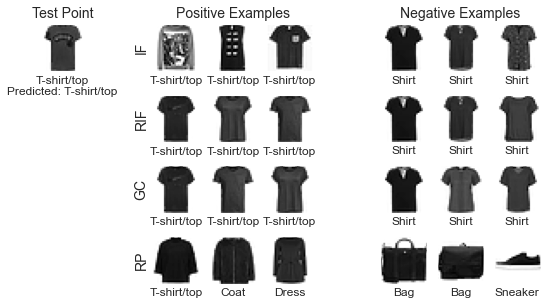

In [7]:
# Example of a T-Shirt/top.
e.disp_local(test_idx=19)

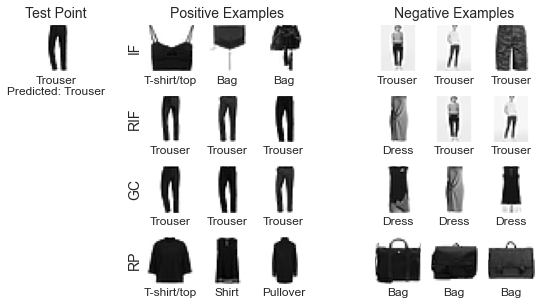

In [8]:
# Example of a Trouser.
e.disp_local(test_idx=2)

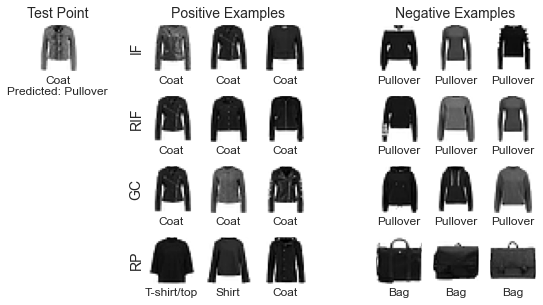

In [10]:
# Example of a misclassification.
e.disp_local(test_idx=10)

## Comparing Diversity

### Average Pairwise Distance

k = 3:
 RDM (All): 11.454 ± 1.803
RDM (Same): 8.706 ± 1.916
        IF: 8.283 ± 2.731
       RIF: 5.319 ± 1.775
        GC: 5.050 ± 1.519
        RP: 9.378 ± 1.674
k = 5:
 RDM (All): 11.365 ± 1.170
RDM (Same): 8.732 ± 1.554
        IF: 8.256 ± 2.230
       RIF: 5.524 ± 1.680
        GC: 5.207 ± 1.425
        RP: 9.490 ± 1.347
k = 10:
 RDM (All): 11.395 ± 0.772
RDM (Same): 8.707 ± 1.333
        IF: 8.293 ± 1.805
       RIF: 5.843 ± 1.589
        GC: 5.507 ± 1.383
        RP: 9.655 ± 1.219


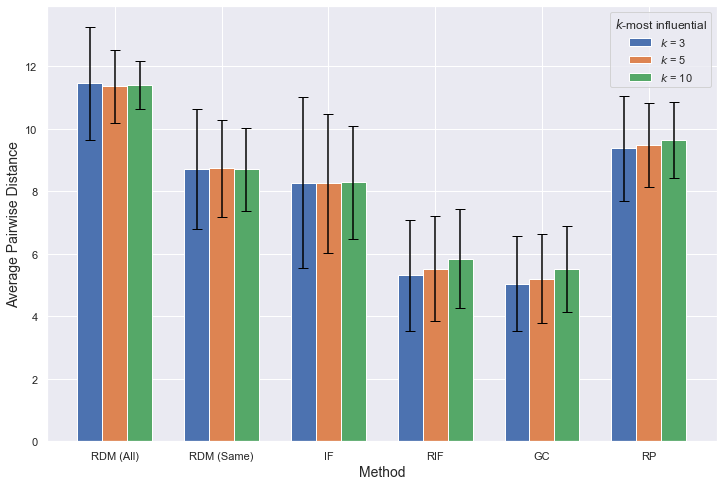

In [11]:
e.apd()

### DIVINE

Optimal Gamma for IF = 2.559548e-02
Optimal Gamma for RIF = 2.682696e-03
Optimal Gamma for GC = 2.559548e-02
Optimal Gamma for RP = 7.906043e-02


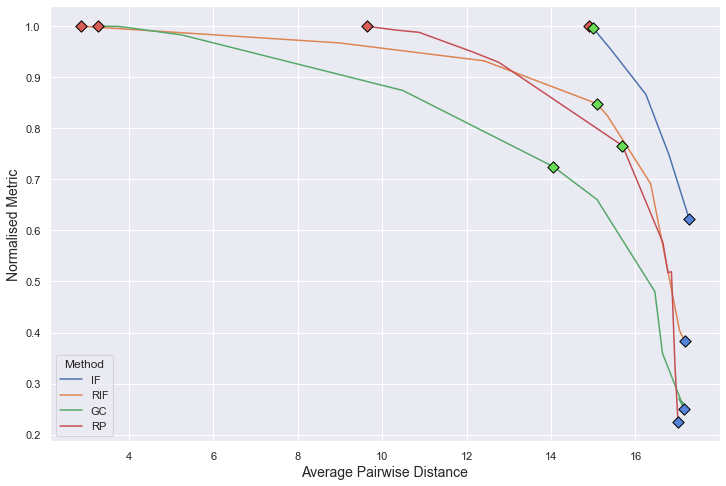

In [12]:
e.gamma_tradeoff_local(test_idx=2)

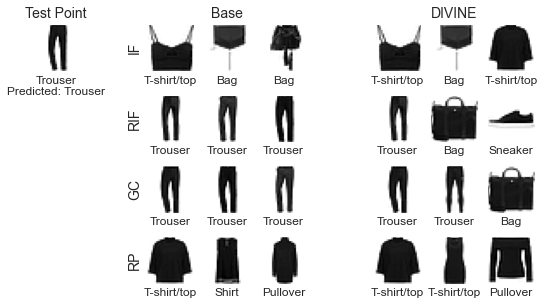

In [7]:
# test_idx = 2:
# Optimal Gamma for IF = 2.559548e-02
# Optimal Gamma for RIF = 2.682696e-03
# Optimal Gamma for GC = 2.559548e-02
# Optimal Gamma for RP = 7.906043e-02

e.divine_local(test_idx=2, gammas={"inf": 2.6e-02, "rif": 2.7e-03, "gc": 2.6e-02, "rp": 7.9e-02})

### TSNE Plots

In [16]:
e.fit_tsne()

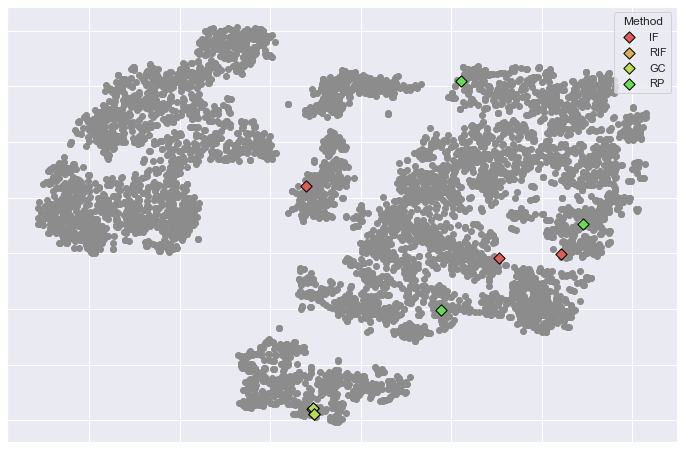

In [19]:
e.tsne_local(test_idx=2, gammas={"inf": 2.6e-02, "rif": 2.7e-03, "gc": 2.6e-02, "rp": 7.9e-02})

## Comparing Relevance

### Number of Unique Examples

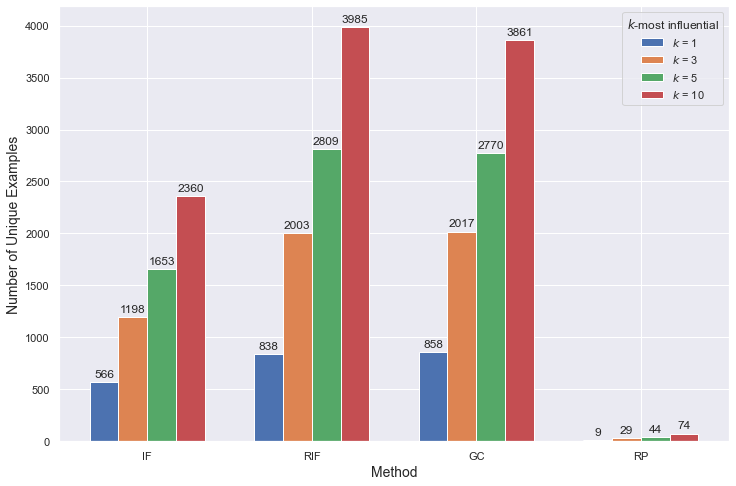

In [14]:
e.unique_examples()

### Identical Class Test

k = 1:
 IF: 0.755 ± 0.430
RIF: 0.811 ± 0.392
 GC: 0.811 ± 0.392
 RP: 0.099 ± 0.299
k = 3:
 IF: 0.763 ± 0.425
RIF: 0.811 ± 0.391
 GC: 0.811 ± 0.392
 RP: 0.091 ± 0.288
k = 5:
 IF: 0.761 ± 0.427
RIF: 0.811 ± 0.391
 GC: 0.811 ± 0.392
 RP: 0.091 ± 0.287
k = 10:
 IF: 0.764 ± 0.425
RIF: 0.811 ± 0.392
 GC: 0.811 ± 0.392
 RP: 0.098 ± 0.297


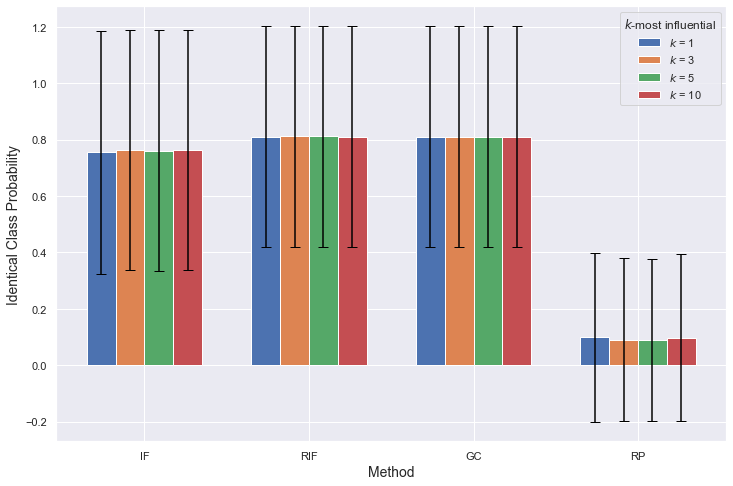

In [15]:
e.id_class_test()